In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
apps = pd.read_csv('apps.csv')

In [3]:
apps = apps.dropna().reset_index(drop=True)
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null int64
Size              9360 non-null object
Installs          9360 non-null object
Type              9360 non-null object
Price             9360 non-null object
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 950.8+ KB


# Clean the datasets on Installs, Price and Size Columns
Data on Size, Installs, and Price contain unwanted character like M,+,etc

In [4]:
apps = apps[apps.Size != 'Varies with device'].reset_index()
apps = apps.dropna()
pattern_M = re.compile('\S*M')
pattern_k = re.compile('\S*k')

#We scale for KB size to MB size
for i,val in enumerate(apps['Size']):
    if bool(pattern_M.match(val)):
        apps.loc[i,'Size'] = float(val.replace('M',''))
    elif bool(pattern_k.match(val)):
        apps.loc[i,'Size'] = float(val.replace('k',''))/1000
        
apps['Size'] = pd.to_numeric(apps['Size'])
chars = [',','+','$']
cols = ['Installs','Price']

for col in cols:
    for char in chars:
        apps[col] = apps[col].str.replace(char,'')
    apps[col] = pd.to_numeric(apps[col])

In [5]:
apps.head()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


# Exploring App Category
We analyze data by counting the number of apps per category.
From the graph we can know that family category has the most apps, followed by game and tools category.

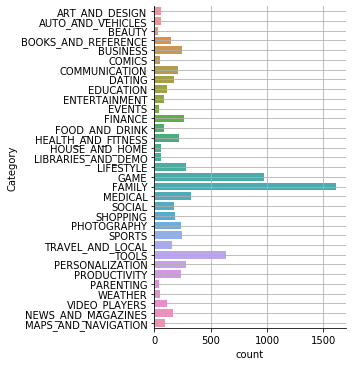

In [6]:
category_num = pd.DataFrame(apps.Category.value_counts().sort_values(ascending=False))
ax = sns.catplot(y = 'Category', data = apps, kind='count')
plt.grid(True)

# App Price and Size
In this section we will analyze the relation between apps size or price with rating value. From the first graph we know that apps with size less than 10MB and price between $0-20 more likely getting higher rating 

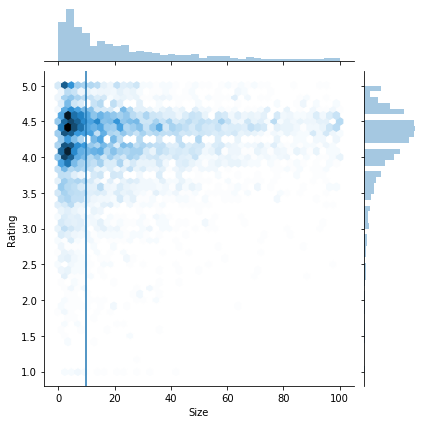

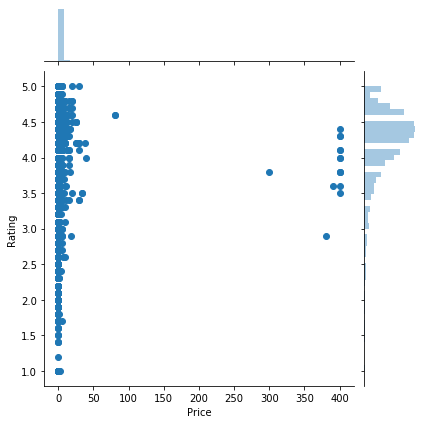

In [7]:
plt1 = sns.jointplot(x = 'Size', y = 'Rating', data = apps, kind = 'hex')
plt1.ax_joint.axvline(x=10)
plt2 = sns.jointplot(x = 'Price', y = 'Rating', data = apps)

# Category and Price Analysis
In this section we're gonna see what category has higher price.
In dataframe we could see that many junk apps with 'I'm rich' title, next section we're going to drop it off.

,App,Category,Price
2911,most expensive app (H),FAMILY,399.99
3041,💎 I'm rich,LIFESTYLE,399.99
3045,I'm Rich - Trump Edition,LIFESTYLE,400.00
3792,I am rich,LIFESTYLE,399.99
3795,I am Rich Plus,FAMILY,399.99
3796,I am rich VIP,LIFESTYLE,299.99
3797,I Am Rich Premium,FINANCE,399.99
3798,I am extremely Rich,LIFESTYLE,379.99
3799,I am Rich!,FINANCE,399.99
3800,I am rich(premium),FINANCE,399.99


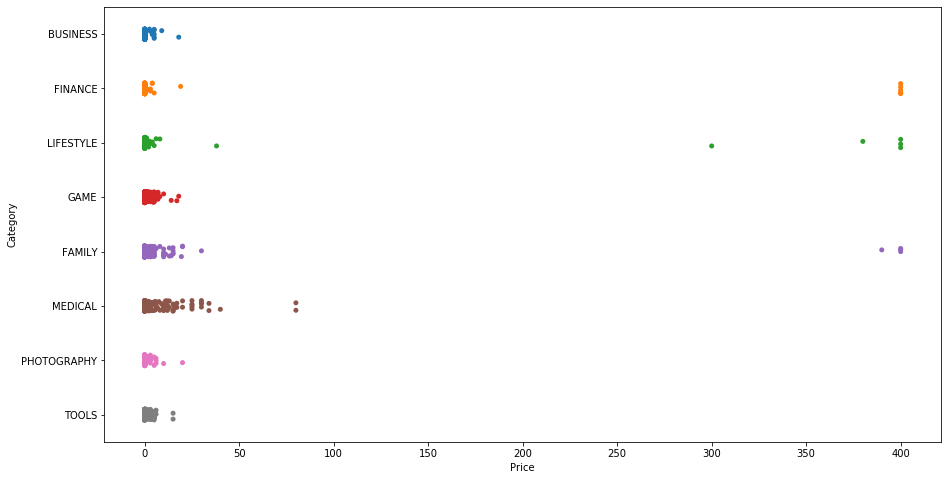

In [8]:
popular_apps = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

fig,ax = plt.subplots()
fig.set_size_inches(15, 8)

ax = sns.stripplot(x = 'Price', y = 'Category', data = popular_apps, jitter = True)

apps_above_250 = popular_apps[['App','Category','Price']][popular_apps['Price']>250]
apps_above_250

# Removing Junk apps

Text(0.5, 1.0, 'Apps Pricing After Filtering for Junk Apps')

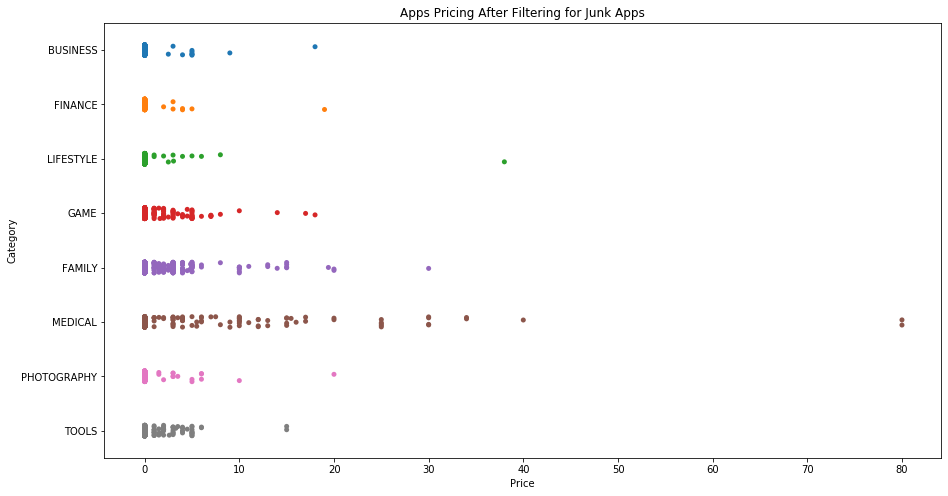

In [9]:
popular_apps = popular_apps[popular_apps.Price<100]

fig,ax = plt.subplots()
fig.set_size_inches(15, 8)

ax = sns.stripplot(x = 'Price', y = 'Category', data = popular_apps, jitter = True)
ax.set_title('Apps Pricing After Filtering for Junk Apps')

# Free vs Paid Apps Popularity
In this Section we're going to see if paid apps got more installs or less. In the graphic we can see that paid apps have lower number of intsalls than paid apps.

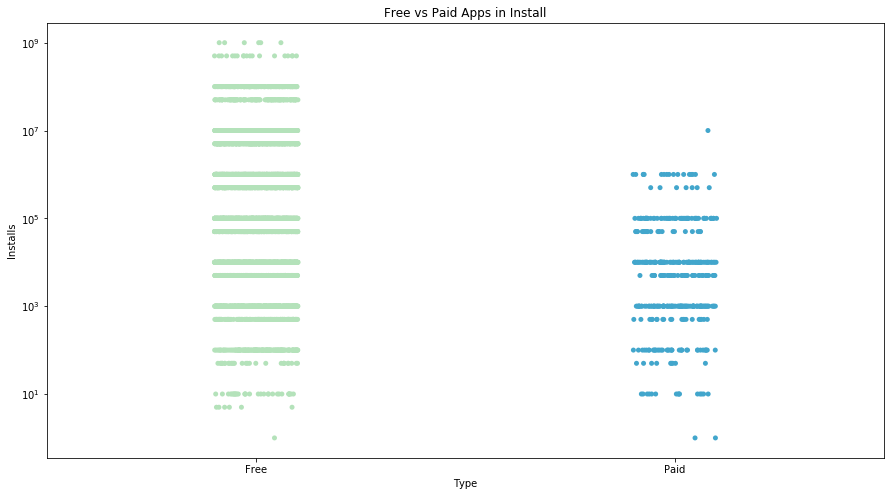

In [34]:
fig,ax = plt.subplots()
fig.set_size_inches(15, 8)
ax = sns.stripplot(x='Type',y='Installs', data=popular_apps, palette='GnBu').set_title('Free vs Paid Apps in Install')
ax = plt.yscale('log')

# Sentiment Analysis
In this section we're going to analysis the sentiment from user reviews dataset on free vs paid apps. In the graph, paid apps has more positive sentiment. This could represent that paid apps got more quality than free apps, and free apps have negative outliers that indicates extremely negative comments.

In [37]:
review_df = pd.read_csv('user_reviews.csv')

#Let's clean it from nan values
review_df = review_df.dropna()
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
App                       37427 non-null object
Translated_Review         37427 non-null object
Sentiment                 37427 non-null object
Sentiment_Polarity        37427 non-null float64
Sentiment_Subjectivity    37427 non-null float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [40]:
merge_df = pd.merge(apps, review_df, on = 'App', how = "inner")
assert merge_df.notnull().all().all()
merge_df.head()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
4,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


Text(0.5, 1.0, 'Sentiment in Free vs Paid Apps')

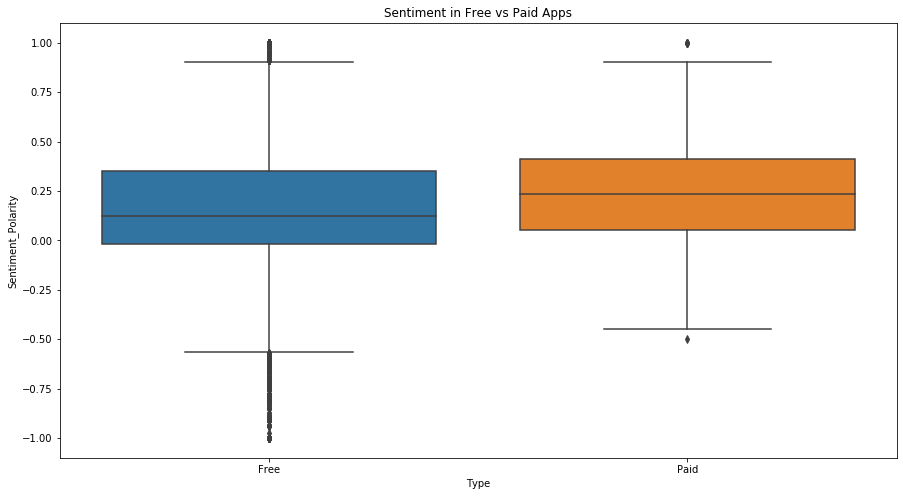

In [42]:
fig,ax = plt.subplots()
fig.set_size_inches(15, 8)

sns.boxplot(x='Type',y='Sentiment_Polarity', data=merge_df).set_title('Sentiment in Free vs Paid Apps')